In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [23]:
df = pd.read_csv('../data/multitask_processed.csv')

/tmp/ipykernel_5851/3190428853.py:1: DtypeWarning: Columns (2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2105,2106,2107,2108,2109,2110,2111,2112,2113,2187,2188,2189,2190,2191,2192,2193,2194,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2214,2215,2216,2217,2218,2219,2220,2221,2223,2224,2225,2226,2227,2228,2229,2230,2232,2233,2234,2235,2236,2237,2238,2239,2241,2242,2243,2244,2245,2246,2247,2248,2250,2251,2252,2253,2254,2255,2256,2257,2259,2260,2261,2262,2263,2264,2265,2266,2268,2269,2270,2271,2272,2273,2274,2275,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2312,2313,2314,2315,2316,2317,2318,2319,2320,2393,2394,2395,2396,2397,2398,2399,2400,2401,2403,2404,2405,2406,2407,2408,2409,2410,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2430,2431,2432,2433,2434,2435,2436,2437,2439,2440,2441,2442,2443,2444,2445,2446,2448,2449,2450,2451,2452,2453,2454,2455,2457,2458,

## Exploration of the multitask dataset

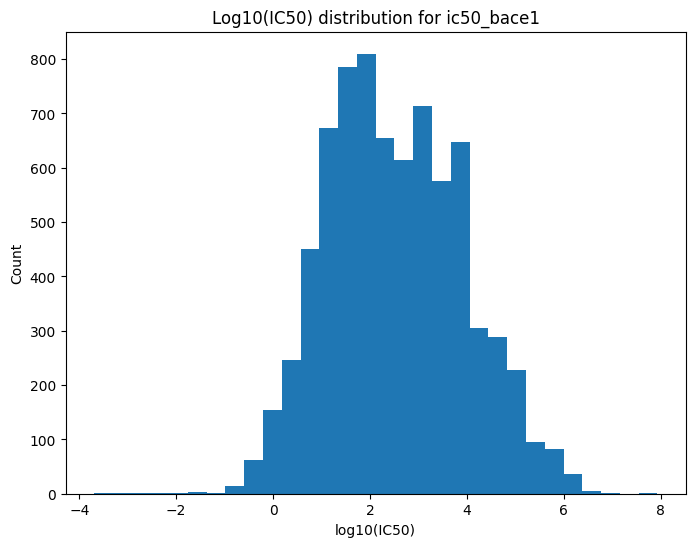

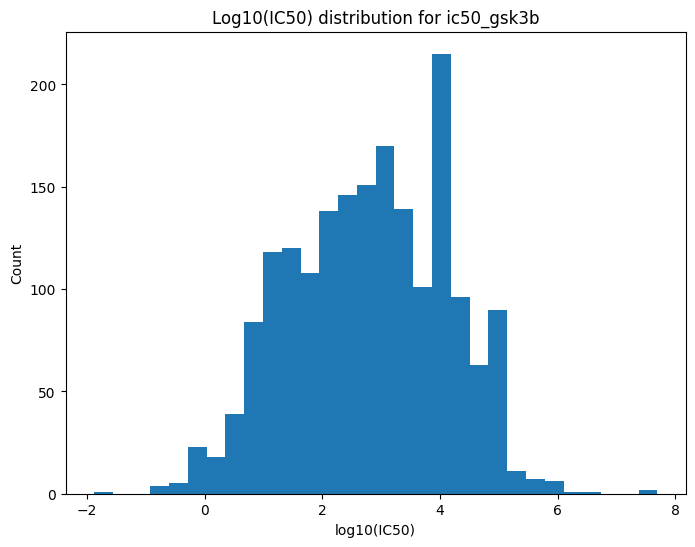

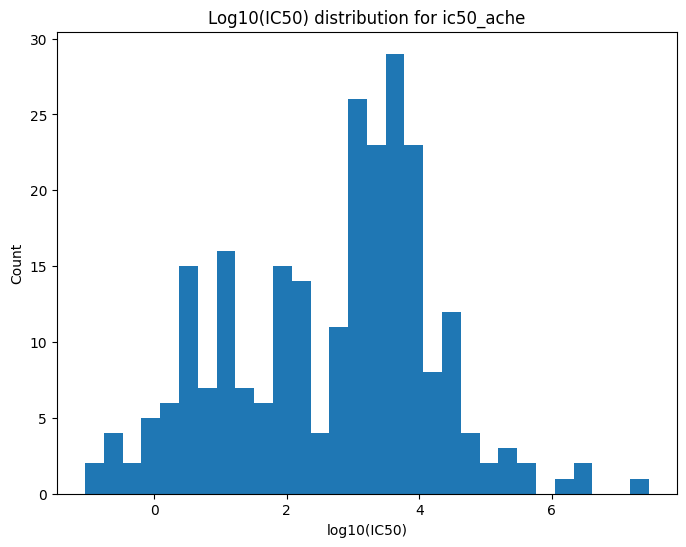

In [17]:
targets = [col for col in df.columns if col.startswith('ic50_')]
for t in targets:
    plt.hist(df[t].apply(np.log10), bins=30)
    plt.title(f'Log10(IC50) distribution for {t}')
    plt.xlabel('log10(IC50)')
    plt.ylabel('Count')
    plt.show()

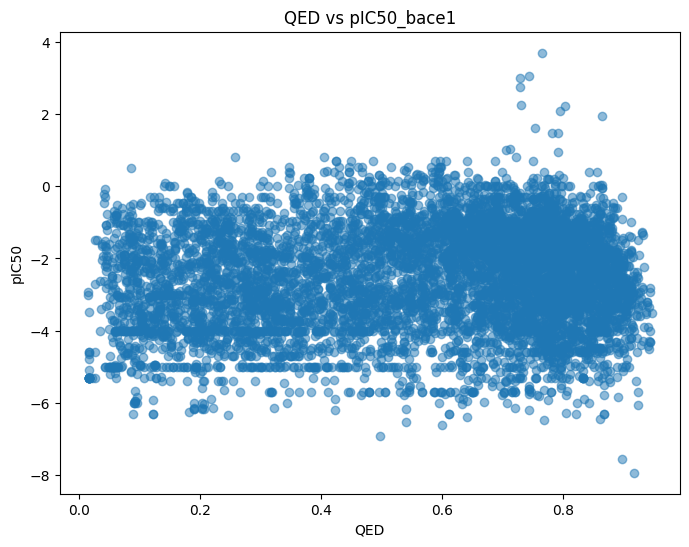

In [18]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.QED import qed

df['QED'] = df['smiles'].apply(lambda s: qed(MolFromSmiles(s)))
plt.scatter(df['QED'], -np.log10(df['ic50_bace1']), alpha=0.5)
plt.title('QED vs pIC50_bace1')
plt.xlabel('QED')
plt.ylabel('pIC50')
plt.show()

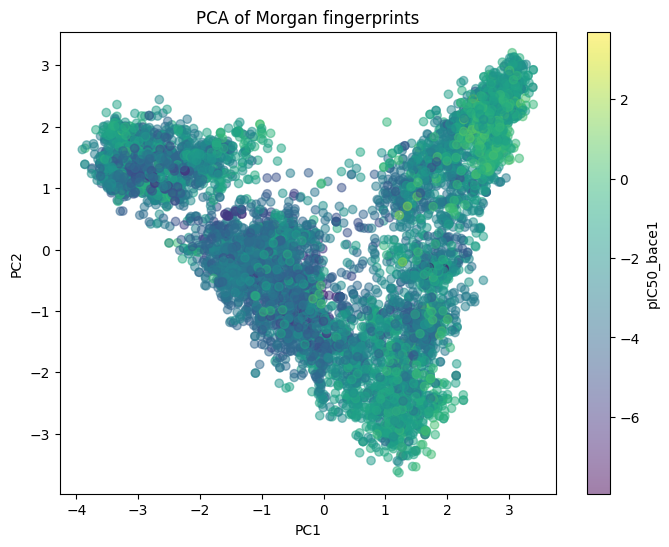

In [19]:
fp_cols = [c for c in df.columns if c.startswith('fp_')]
X_fp = df[fp_cols].values
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_fp)
plt.scatter(pcs[:,0], pcs[:,1], c=-np.log10(df['ic50_bace1']), cmap='viridis', alpha=0.5)
plt.colorbar(label='pIC50_bace1')
plt.title('PCA of Morgan fingerprints')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [21]:
desc_cols = df.columns.difference(['smiles'] + targets + fp_cols + ['QED'])
sample_idx = np.random.choice(df.index, size=1000, replace=False)
X_desc = df.loc[sample_idx, desc_cols].fillna(0).values
tsne = TSNE(n_components=2, random_state=42)
tsx = tsne.fit_transform(X_desc)
plt.scatter(tsx[:,0], tsx[:,1], c=-np.log10(df.loc[sample_idx,'ic50_bace1']), cmap='plasma', alpha=0.5)
plt.colorbar(label='pIC50_bace1')
plt.title('t-SNE of Mordred descriptors')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

ValueError: could not convert string to float: "missing intrinsic state for ['Cl'] (ATS0s/Props)"